In [1]:
# prompt: mount to drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/DL/May2025
!ls

/content/drive/MyDrive/DL/May2025
 BT_01	        LSTM.ipynb	       test_02.csv	       train_02.csv
 DL_CK_01.pdf  'test_02 Cleaned.csv'  'train_02 Cleaned.csv'


In [4]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [23]:
df = pd.read_csv("train_02.csv")

In [24]:
df.head(5)

,Class Index,Description
0,3,"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Reuters - Private investment firm Carlyle Grou...
2,3,Reuters - Soaring crude prices plus worries\ab...
3,3,Reuters - Authorities have halted oil export\f...
4,3,"AFP - Tearaway world oil prices, toppling reco..."


In [25]:
print(df['Class Index'].value_counts())

Class Index
3    30000
4    30000
2    30000
1    30000
Name: count, dtype: int64


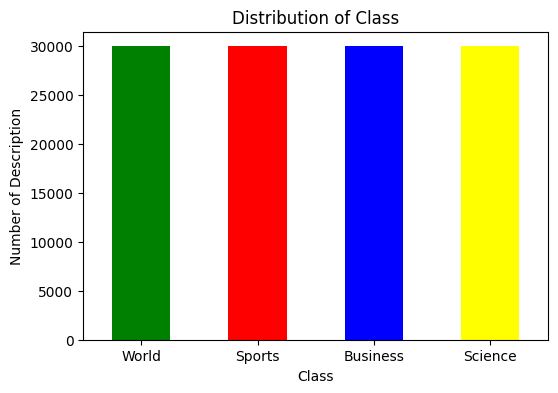

In [26]:
import matplotlib.pyplot as plt

class_counts = df['Class Index'].value_counts()
class_counts = class_counts.sort_index()

plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['green', 'red', 'blue', 'yellow'])
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Number of Description')
plt.xticks([0, 1, 2, 3], ['World', 'Sports', 'Business', 'Science'], rotation=0)
plt.show()

In [27]:

print(df['Description'][11])

 TEHRAN (Reuters) - OPEC can do nothing to douse scorching  oil prices when markets are already oversupplied by 2.8 million  barrels per day (bpd) of crude, Iran's OPEC governor said  Saturday, warning that prices could fall sharply.


In [28]:
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

def remove_digits(text):
    return re.sub(r'\d', '', text)

import string,time
string.punctuation

exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))


from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    tokens = word_tokenize(text)
    return ' '.join([word for word in tokens if word not in stop_words])

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(word) for word in tokens])

In [ ]:
print(stop_words)

{'hasn', 'some', 'those', 'her', 'more', 'needn', 'after', 'this', 'who', "don't", "it's", "he'll", 'so', "we'll", 'above', 'your', 'below', 'wouldn', 'not', 'an', 'of', "shan't", 'few', "hadn't", 'both', 'll', 'me', 'can', 'couldn', 'in', 'that', 'hadn', "it'd", "they've", 'having', 'o', 'being', 'what', "you've", 'for', "wouldn't", "you'll", "she'll", 'the', 'until', 'ourselves', "isn't", 'from', "he'd", 'mustn', 'again', 'off', 'if', 'then', 'ma', "they'll", "needn't", 'he', 'his', 'very', "we've", 'nor', 'now', "wasn't", 'further', "i'll", 'ours', 'it', 'other', "hasn't", 'or', 'wasn', 't', "we're", 'won', 'is', "couldn't", 'they', 'out', 'any', 'theirs', 'when', 'don', 'but', 'we', 'myself', 'was', 'here', "didn't", 'mightn', 'no', 'isn', "she's", 'doesn', 'y', 'by', 'into', 'doing', 'are', 'during', 'because', 'their', "it'll", "i'd", 'were', 'will', 'as', 'itself', 'whom', 'd', 'weren', 'you', "haven't", 'my', 'each', 'didn', 'over', 'am', 'our', 'same', "weren't", 'between', 't

In [ ]:
print(remove_stopwords("us"))

us


In [29]:
def text_cleaning(text):
    text = remove_html_tags(text)
    text = remove_url(text)
    text = text.lower()
    text = remove_digits(text)
    text = remove_punc(text)
    text = remove_stopwords(text)
    return text

In [30]:
df['Description'] = df['Description'].apply(text_cleaning)
df.to_csv('train_02 Cleaned.csv', index=False)

In [31]:
df_test = pd.read_csv("test_02.csv")
df_test['Description'] = df_test['Description'].apply(text_cleaning)
df_test.to_csv('test_02 Cleaned.csv', index=False)

In [5]:
df = pd.read_csv("train_02 Cleaned.csv")

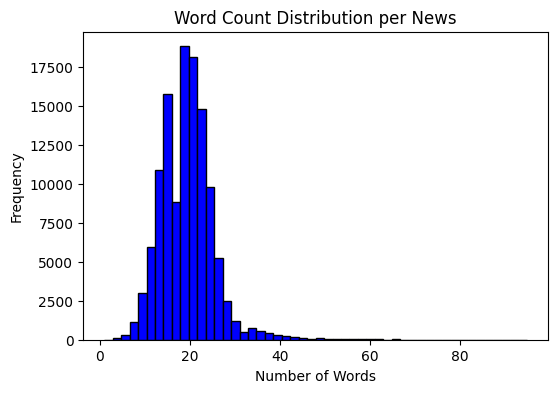

In [6]:
word_counts = df['Description'].str.split().str.len()

plt.figure(figsize=(6, 4))
plt.hist(word_counts, bins=50, color='blue', edgecolor='black')
plt.title('Word Count Distribution per News')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [33]:

print("After cleaning:")
print(df['Class Index'].value_counts())
print("Word count per review:")
print(df['Description'].str.split().str.len().describe())

After cleaning:
Class Index
3    30000
4    30000
2    30000
1    30000
Name: count, dtype: int64
Word count per review:
count    120000.000000
mean         19.413733
std           5.982233
min           1.000000
25%          16.000000
50%          19.000000
75%          22.000000
max          95.000000
Name: Description, dtype: float64


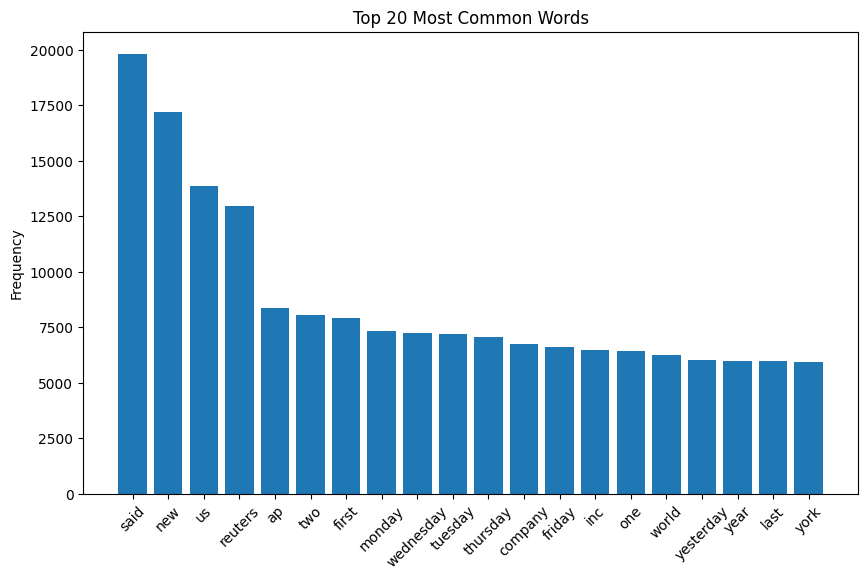

In [39]:

all_words = ' '.join(df['Description']).split()
most_common = Counter(all_words).most_common(20)

words, counts = zip(*most_common)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

In [35]:
# prompt: 30 từ ít được dùng nhất

# Calculate word counts for all words in the cleaned descriptions
all_words = ' '.join(df['Description']).split()
word_counts = Counter(all_words)

# Get the 30 least common words
least_common = word_counts.most_common()[-30:]

print("30 least common words and their counts:")
for word, count in least_common:
    print(f"{word}: {count}")


30 least common words and their counts:
reigncom: 1
coex: 1
moghul: 1
dollhouse: 1
doras: 1
bella: 1
dancerella: 1
gluefingered: 1
sehorn: 1
xxxv: 1
weekwith: 1
themarket: 1
thebusiest: 1
fiveyears: 1
megadealsalone: 1
northernexport: 1
saturdayhalting: 1
acehs: 1
megadeals: 1
thatsudan: 1
anevening: 1
quitlebanon: 1
keypositions: 1
andredeployed: 1
interrogating: 1
faultfilled: 1
threebook: 1
rauffer: 1
windaffected: 1
candlelight: 1


In [44]:
df_train = pd.read_csv("train_02 Cleaned.csv")
df_test = pd.read_csv("test_02 Cleaned.csv")
df_train['Class Index'] = df_train['Class Index'].map({4 : 3, 3: 2, 2: 1, 1 : 0})
df_test['Class Index'] = df_test['Class Index'].map({4 : 3, 3: 2, 2: 1, 1 : 0})

X_train = df_train['Description']
y_train = df_train['Class Index']
X_test = df_test['Description']
y_test = df_test['Class Index']


from collections import Counter

def tokenize(text):
    return word_tokenize(text)

# Xây dựng vocab từ training set
counter = Counter()
for text in X_train:
    counter.update(tokenize(text))

vocab = {'<PAD>': 0, '<UNK>': 1}
for word, freq in counter.items():
    if freq >= 5 and freq <= 8000:
        vocab[word] = len(vocab)

def encode(text, vocab, max_len=30):
    tokens = tokenize(text)
    ids = [vocab.get(token, vocab['<UNK>']) for token in tokens[-max_len:]]
    return [vocab['<PAD>']] * (max_len - len(ids)) + ids


In [43]:
print(len(vocab))

25232


In [45]:
class NewsDataset(Dataset):
    def __init__(self, texts, labels, vocab, max_len=30):
        self.texts = texts
        self.labels = labels.values
        self.vocab = vocab
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        x = encode(self.texts.iloc[idx], self.vocab, self.max_len)
        y = self.labels[idx]
        return torch.tensor(x, dtype=torch.long), torch.tensor(y, dtype=torch.long)

train_dataset = NewsDataset(X_train, y_train, vocab)
test_dataset = NewsDataset(X_test, y_test, vocab)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)


In [46]:
import torch.nn as nn
import torch

class NewsRNN(nn.Module):
    def __init__(self, vocab_size, embed_dim=256, hidden_dim=64, num_layers=3, out_dim=4):
        super(NewsRNN, self).__init__()

        self.hidden_size = hidden_dim
        self.num_layers = num_layers
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, out_dim)

    def init_hidden(self, batch_size, device):
        return (torch.zeros(self.num_layers, batch_size, self.hidden_size).to(device),
                torch.zeros(self.num_layers, batch_size, self.hidden_size).to(device))

    def forward(self, x, state=None, return_state=False):
        x = self.embedding(x)
        if state is None:
            state = self.init_hidden(x.size(0), x.device)
        out, state = self.lstm(x, state)

        out = self.fc(out[:, -1, :])  # dùng hidden tại bước cuối
        return out if not return_state else (out, state)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = NewsRNN(vocab_size=len(vocab)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

model

NewsRNN(
  (embedding): Embedding(25233, 256, padding_idx=0)
  (lstm): LSTM(256, 64, num_layers=3, batch_first=True)
  (fc): Linear(in_features=64, out_features=4, bias=True)
)

In [47]:
# prompt: tham số từng lớp

def count_parameters(model):
    """
    Prints the number of trainable parameters for each layer in a PyTorch model.
    """
    print("Trainable parameters per layer:")
    total_params = 0
    for name, param in model.named_parameters():
        if param.requires_grad:
            num_params = param.numel()
            print(f"{name}: {num_params}")
            total_params += num_params
    print(f"Total trainable parameters: {total_params}")

count_parameters(model)


Trainable parameters per layer:
embedding.weight: 6459648
lstm.weight_ih_l0: 65536
lstm.weight_hh_l0: 16384
lstm.bias_ih_l0: 256
lstm.bias_hh_l0: 256
lstm.weight_ih_l1: 16384
lstm.weight_hh_l1: 16384
lstm.bias_ih_l1: 256
lstm.bias_hh_l1: 256
lstm.weight_ih_l2: 16384
lstm.weight_hh_l2: 16384
lstm.bias_ih_l2: 256
lstm.bias_hh_l2: 256
fc.weight: 256
fc.bias: 4
Total trainable parameters: 6608900


In [48]:
def evaluate(model, test_loader, save_wrong_predict=False):
    model.eval()
    correct = 0
    total = 0
    wrong_predictions = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            if save_wrong_predict:
                for i in range(labels.size(0)):
                    total += 1
                    if predicted[i] == labels[i]:
                        correct += 1
                    else:
                        wrong_predictions.append({
                            'input': inputs[i].cpu(),        # Chuyển về CPU nếu cần xem
                            'predicted': predicted[i].item(),
                            'label': labels[i].item()
                        })
            else:
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
            accuracy = correct / total
    return accuracy, wrong_predictions

Epoch 1, Loss: 0.4372
Epoch 1, Accuracy: 0.8850
Epoch 2, Loss: 0.2602
Epoch 2, Accuracy: 0.8951
Epoch 3, Loss: 0.1977
Epoch 3, Accuracy: 0.8980
Epoch 4, Loss: 0.1489
Epoch 4, Accuracy: 0.8966
Epoch 5, Loss: 0.1104
Epoch 5, Accuracy: 0.8926
Epoch 6, Loss: 0.0825
Epoch 6, Accuracy: 0.8914
Epoch 7, Loss: 0.0622
Epoch 7, Accuracy: 0.8914
Epoch 8, Loss: 0.0502
Epoch 8, Accuracy: 0.8905
Epoch 9, Loss: 0.0398
Epoch 9, Accuracy: 0.8887
Epoch 10, Loss: 0.0332
Epoch 10, Accuracy: 0.8903


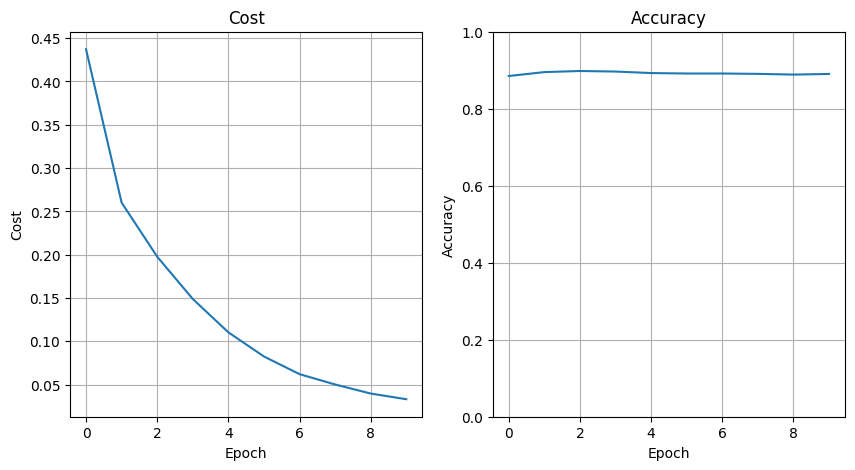

In [49]:
import matplotlib.pyplot as plt
import numpy as np

costs = []
accs = []

# Train loop
for epoch in range(10):
    model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels.long())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")
    costs.append(total_loss/len(train_loader))
    accuracy, _ = evaluate(model, test_loader)
    accs.append(accuracy)
    print(f"Epoch {epoch+1}, Accuracy: {accuracy:.4f}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(np.squeeze(costs))
plt.title('Cost')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(np.squeeze(accs))
plt.title('Accuracy')
plt.ylim(0, 1)  # Giới hạn trục y từ 0 đến 1
plt.xlabel('Epoch')  # Nếu trục x là số epoch
plt.ylabel('Accuracy')  # Nhãn trục y
plt.grid(True)  # (tùy chọn) giúp dễ đọc hơn
plt.show()


In [50]:
def convert_input(text):
    input_indices = text.tolist()
    # Tạo dictionary ngược từ index về từ
    reverse_vocab = {idx: word for word, idx in vocab.items()}

    # Chuyển các chỉ số về từ
    input_words = [reverse_vocab.get(idx, '<UNK>') for idx in input_indices]

    # Lọc bỏ các token PAD để có câu gốc (hoặc phần cuối câu)
    input_sentence = ' '.join([word for word in input_words if word != '<PAD>'])
    return input_sentence


In [51]:
NewsClass = {0: 'World', 1: 'Sports', 2: 'Business', 3: 'Science'}

acc, wrongs = evaluate(model, test_loader, save_wrong_predict=True)
print("Accuracy:", acc)
print("Number of wrong predictions:", len(wrongs))

# In ra 3 dự đoán sai đầu tiên (nếu có)
for i, item in enumerate(wrongs[:10]):
    print(f"\nWrong #{i+1}:")
    # print("Input:", item['input'])
    print("Input Sentence:", convert_input(item['input']))
    print("Predicted:", NewsClass[item['predicted']])
    print("Label:", NewsClass[item['label']])

Accuracy: 0.8902631578947369
Number of wrong predictions: 834

Wrong #1:
Input Sentence: <UNK> barely dawn mike <UNK> starts shift blur colorful maps figures endless charts already knows day bring lightning strike places expects winds pick <UNK> places dry flames roar
Predicted: Sports
Label: Science

Wrong #2:
Input Sentence: schools <UNK> <UNK> downloading <UNK> <UNK> <UNK> got little wrote open letter <UNK> unfortunately <UNK> <UNK> writing <UNK> representatives hope find useful perhaps feel inspired something similar thing happened area
Predicted: Sports
Label: Science

Wrong #3:
Input Sentence: <UNK> police warns phishing fraud squad chief targeted
Predicted: World
Label: Science

Wrong #4:
Input Sentence: life begin one <UNK> clue stems fossil records western australia although whether layered <UNK> biological chemical spawned spirited debate oxford researcher <UNK> <UNK> describes issues contention
Predicted: World
Label: Science

Wrong #5:
Input Sentence: update earnings per sh

In [56]:
NewsClass = {0: 'World', 1: 'Sports', 2: 'Business', 3: 'Science'}

def predict(text):
    model.eval()
    encoded = torch.tensor([encode(text, vocab)], dtype=torch.long).to(device)
    with torch.no_grad():
        output = model(encoded)
        predict = output.argmax().item()
        return NewsClass[predict]

text = df['Description'][1]
print(text)
print(predict(text_cleaning(text)))
print(NewsClass[df['Class Index'][1]-1])


reuters private investment firm carlyle groupwhich reputation making welltimed occasionallycontroversial plays defense industry quietly placedits bets another part market
Business
Business
